<a href="https://www.kaggle.com/code/jonbown/cluster-feature-engineering-tps3e6?scriptVersionId=120127823" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Exploring Clusters using KMeans for Feature Engineering

This is the code I used to explore the value of clustering based on variables that were not performing well with the usual scaling, cardinality reduction, and transformation approach. There are two main parts to this notebook, the first part uses the elbow method to determine the optimal number of clusters based on the entire training dataset. Having 2 or 3 clusters for each variable comes back as optimal. The centroids are then selected and the resulting clusters are used to generate features on the training and test data. The cluster variables are then one-hot encoded to remove noise and explore correlation more explicitly.

The second part automates the creation of clusters and looks at the training data with outliers removed (another strategy that helped my score). Please feel free to use the methods I wrote in this notebook for your own solution!

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s3e6/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e6/test.csv')
samp_sub = pd.read_csv('/kaggle/input/playground-series-s3e6/sample_submission.csv')

In [3]:
KData = train[['price', 'cityCode']]

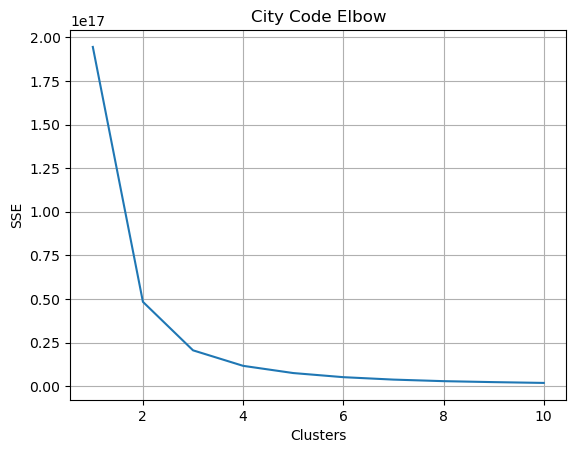

In [4]:
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(KData)
    wcss.append(k_means.inertia_)
#plot elbow curve
plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.title('City Code Elbow')
plt.grid()
plt.show()

In [5]:
k_means_optimum = KMeans(n_clusters = 3, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(KData)
print(y)

train['cityCluster3'] = y

[2 0 0 ... 0 0 0]


In [6]:
#GET CENTERS
c0 = k_means_optimum.cluster_centers_[0][:2]
c1 = k_means_optimum.cluster_centers_[1][:2]
c2 = k_means_optimum.cluster_centers_[2][:2]

In [7]:
#UTIL FUNCTION FOR ASSIGNING CLUSTER TO TEST DATA POINTS
from operator import itemgetter
def test_cluster_calc(row, byVar, centers):
    x1 = row[byVar]
    dist = []
    for cent in centers:
        dist.append(abs(cent[1] - x1))
    index, element = min(enumerate(dist), key=itemgetter(1))
    return index

In [8]:
test['cityCluster3'] = test.apply(lambda row: test_cluster_calc(row, 'cityCode', [c0, c1, c2]), axis=1)

In [9]:
k_means_optimum = KMeans(n_clusters = 2, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(KData)
print(y)

train['cityCluster2'] = y

[0 1 1 ... 1 1 1]


In [10]:
c0 = k_means_optimum.cluster_centers_[0][:2]
c1 = k_means_optimum.cluster_centers_[1][:2]

test['cityCluster2'] = test.apply(lambda row: test_cluster_calc(row, 'cityCode', [c0, c1]), axis=1)

# Year Cluster

In [11]:
KData = train[['price', 'made']]

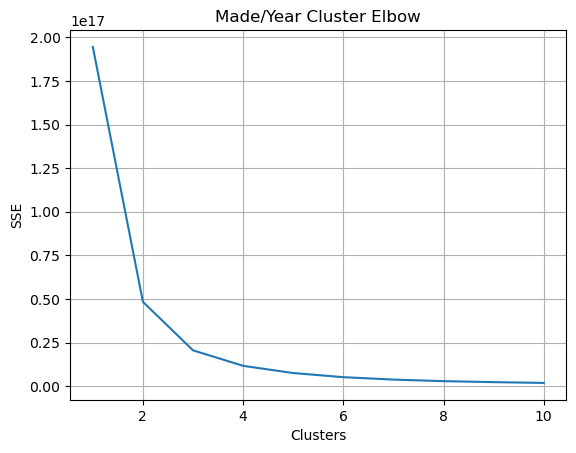

In [12]:
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(KData)
    wcss.append(k_means.inertia_)
#plot elbow curve
plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.title('Made/Year Cluster Elbow')
plt.grid()
plt.show()

In [13]:
k_means_optimum = KMeans(n_clusters = 2, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(KData)
print(y)

train['madeCluster2'] = y

[0 1 1 ... 1 1 1]


In [14]:
#GET CENTERS
c0 = k_means_optimum.cluster_centers_[0][:2]
c1 = k_means_optimum.cluster_centers_[1][:2]

In [15]:
test['madeCluster2'] = test.apply(lambda row: test_cluster_calc(row, 'made', [c0, c1]), axis=1)

# Violin Plots

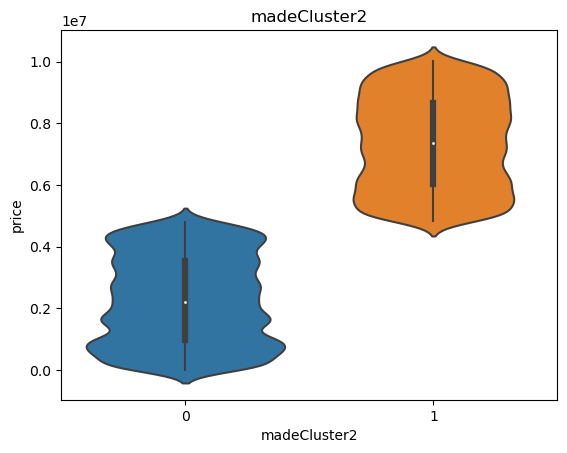

In [16]:
sns.violinplot(x ="madeCluster2",
                   y ="price",
                   data = train)
plt.title('madeCluster2')
plt.show()

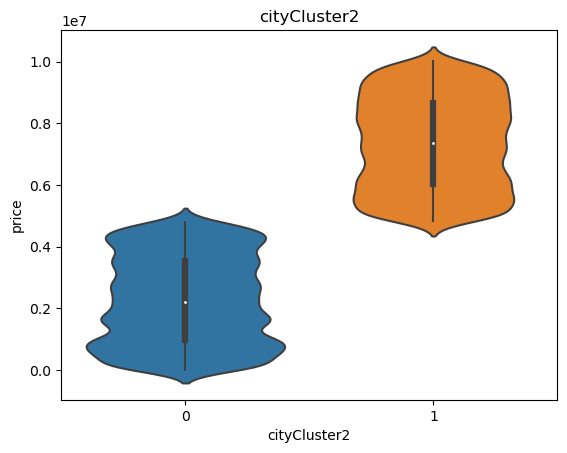

In [17]:
sns.violinplot(x ="cityCluster2",
                   y ="price",
                   data = train)
plt.title('cityCluster2')
plt.show()

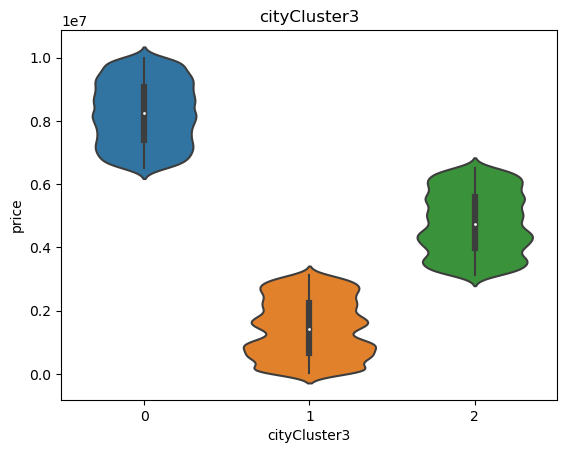

In [18]:
sns.violinplot(x ="cityCluster3",
                   y ="price",
                   data = train)
plt.title('cityCluster3')
plt.show()

# Square Meters Cluster

In [19]:
KData = train[['price', 'squareMeters']]

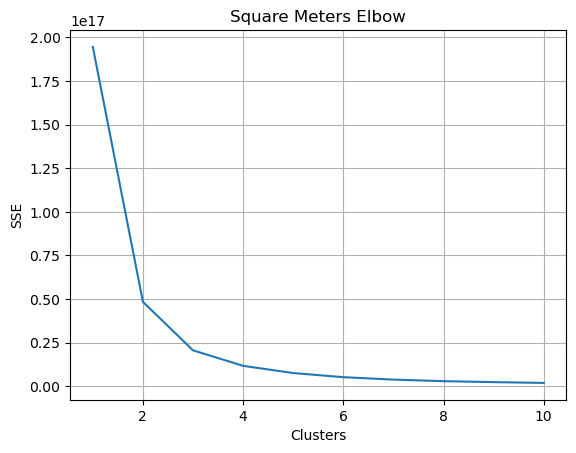

In [20]:
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(KData)
    wcss.append(k_means.inertia_)
#plot elbow curve
plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.title('Square Meters Elbow')
plt.grid()
plt.show()

In [21]:
k_means_optimum = KMeans(n_clusters = 2, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(KData)
print(y)

train['sqMetCluster2'] = y

[0 1 1 ... 1 1 1]


In [22]:
c0 = k_means_optimum.cluster_centers_[0][:2]
c1 = k_means_optimum.cluster_centers_[1][:2]

In [23]:
test['sqMetCluster2'] = test.apply(lambda row: test_cluster_calc(row, 'squareMeters', [c0, c1]), axis=1)

In [24]:
k_means_optimum = KMeans(n_clusters = 3, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(KData)
print(y)

train['sqMetCluster3'] = y

[0 2 2 ... 2 2 2]


In [25]:
c0 = k_means_optimum.cluster_centers_[0][:2]
c1 = k_means_optimum.cluster_centers_[1][:2]
c2 = k_means_optimum.cluster_centers_[2][:2]

In [26]:
test['sqMetCluster3'] = test.apply(lambda row: test_cluster_calc(row, 'squareMeters', [c0, c1, c2]), axis=1)

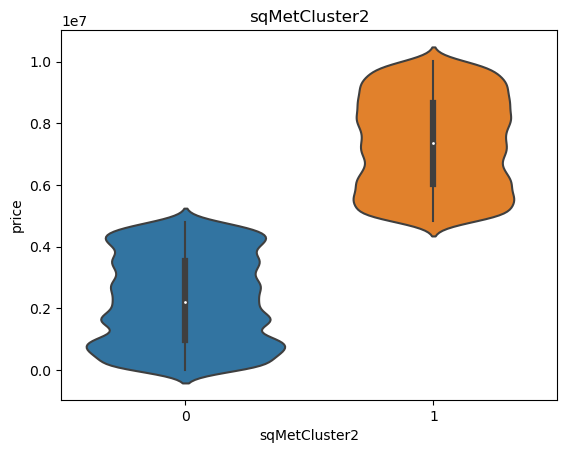

In [27]:
sns.violinplot(x ="sqMetCluster2",
                   y ="price",
                   data = train)
plt.title('sqMetCluster2')
plt.show()

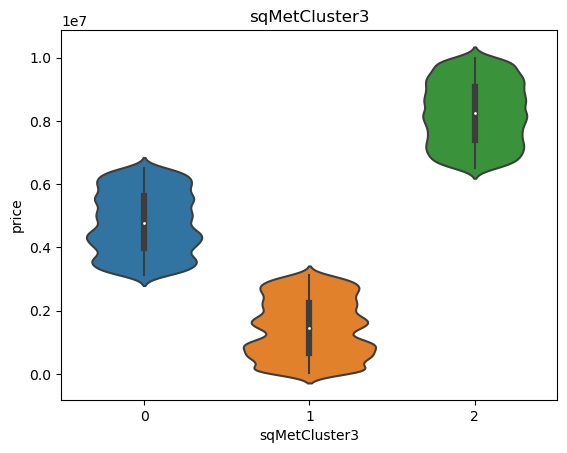

In [28]:
sns.violinplot(x ="sqMetCluster3",
                   y ="price",
                   data = train)
plt.title('sqMetCluster3')
plt.show()

# Number of Rooms

In [29]:
KData = train[['price', 'numberOfRooms']]

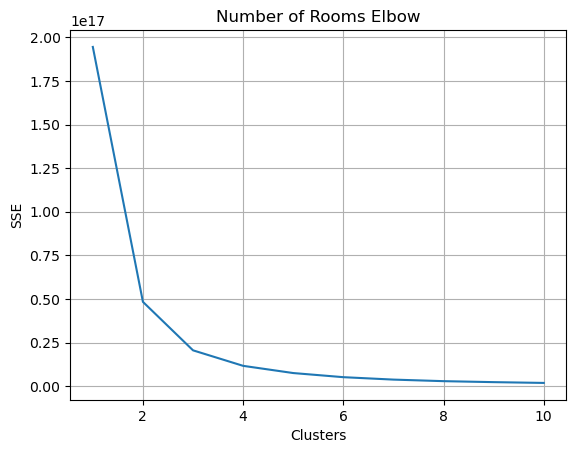

In [30]:
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(KData)
    wcss.append(k_means.inertia_)
#plot elbow curve
plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.title('Number of Rooms Elbow')
plt.grid()
plt.show()

In [31]:
k_means_optimum = KMeans(n_clusters = 2, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(KData)
print(y)

train['nRoomCluster2'] = y

[0 1 1 ... 1 1 1]


In [32]:
c0 = k_means_optimum.cluster_centers_[0][:2]
c1 = k_means_optimum.cluster_centers_[1][:2]

In [33]:
test['nRoomCluster2'] = test.apply(lambda row: test_cluster_calc(row, 'numberOfRooms', [c0, c1]), axis=1)

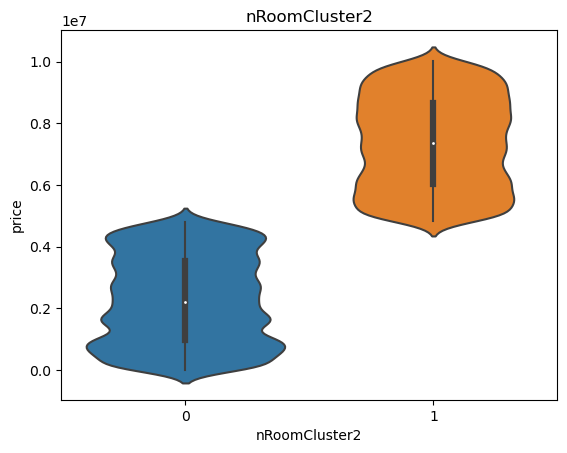

In [34]:
sns.violinplot(x ='nRoomCluster2',
                   y ="price",
                   data = train)
plt.title('nRoomCluster2')
plt.show()

In [35]:
k_means_optimum = KMeans(n_clusters = 3, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(KData)
print(y)

train['nRoomCluster3'] = y

[2 0 0 ... 0 0 0]


In [36]:
c0 = k_means_optimum.cluster_centers_[0][:2]
c1 = k_means_optimum.cluster_centers_[1][:2]
c2 = k_means_optimum.cluster_centers_[2][:2]

In [37]:
test['nRoomCluster3'] = test.apply(lambda row: test_cluster_calc(row, 'numberOfRooms', [c0, c1, c2]), axis=1)

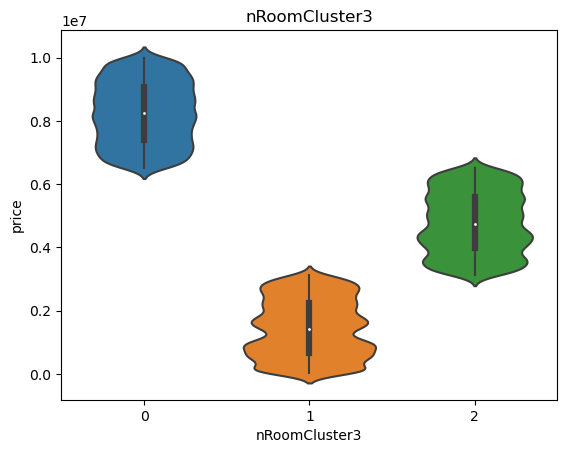

In [38]:
sns.violinplot(x ='nRoomCluster3',
                   y ="price",
                   data = train)
plt.title('nRoomCluster3')
plt.show()

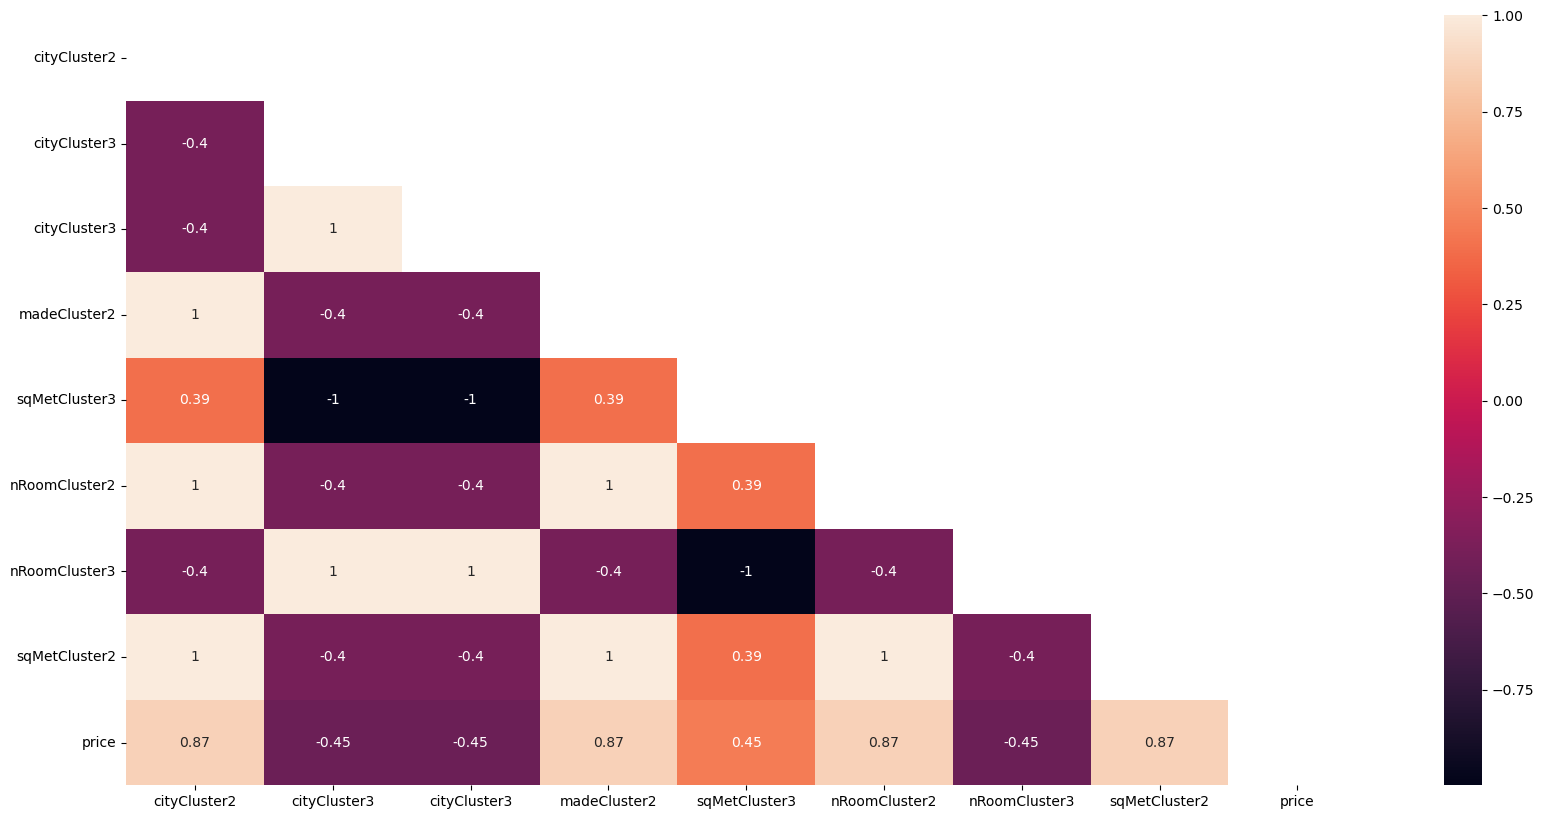

In [39]:
interaction_cols = ['cityCluster2', 'cityCluster3', 'cityCluster3', 'madeCluster2', 'sqMetCluster3', 'nRoomCluster2', 'nRoomCluster3', 'sqMetCluster2', 'price']
plt.figure(figsize=(20,10))
mask = np.triu(np.ones_like(train[interaction_cols].corr()))
sns.heatmap(train[interaction_cols].corr(),annot=True,mask=mask)
plt.show()

# One Hot Encoder

In [40]:
train = pd.get_dummies(train, columns = ['cityPartRange', 'numPrevOwners', 'hasGuestRoom', 'made', 'cityCluster3', 'cityCluster2', 'madeCluster2', 'nRoomCluster3', 'nRoomCluster2', 'sqMetCluster2', 'sqMetCluster3'])
test = pd.get_dummies(test, columns = ['cityPartRange', 'numPrevOwners', 'hasGuestRoom', 'made', 'cityCluster3', 'cityCluster2', 'madeCluster2', 'nRoomCluster3', 'nRoomCluster2', 'sqMetCluster2', 'sqMetCluster3'])

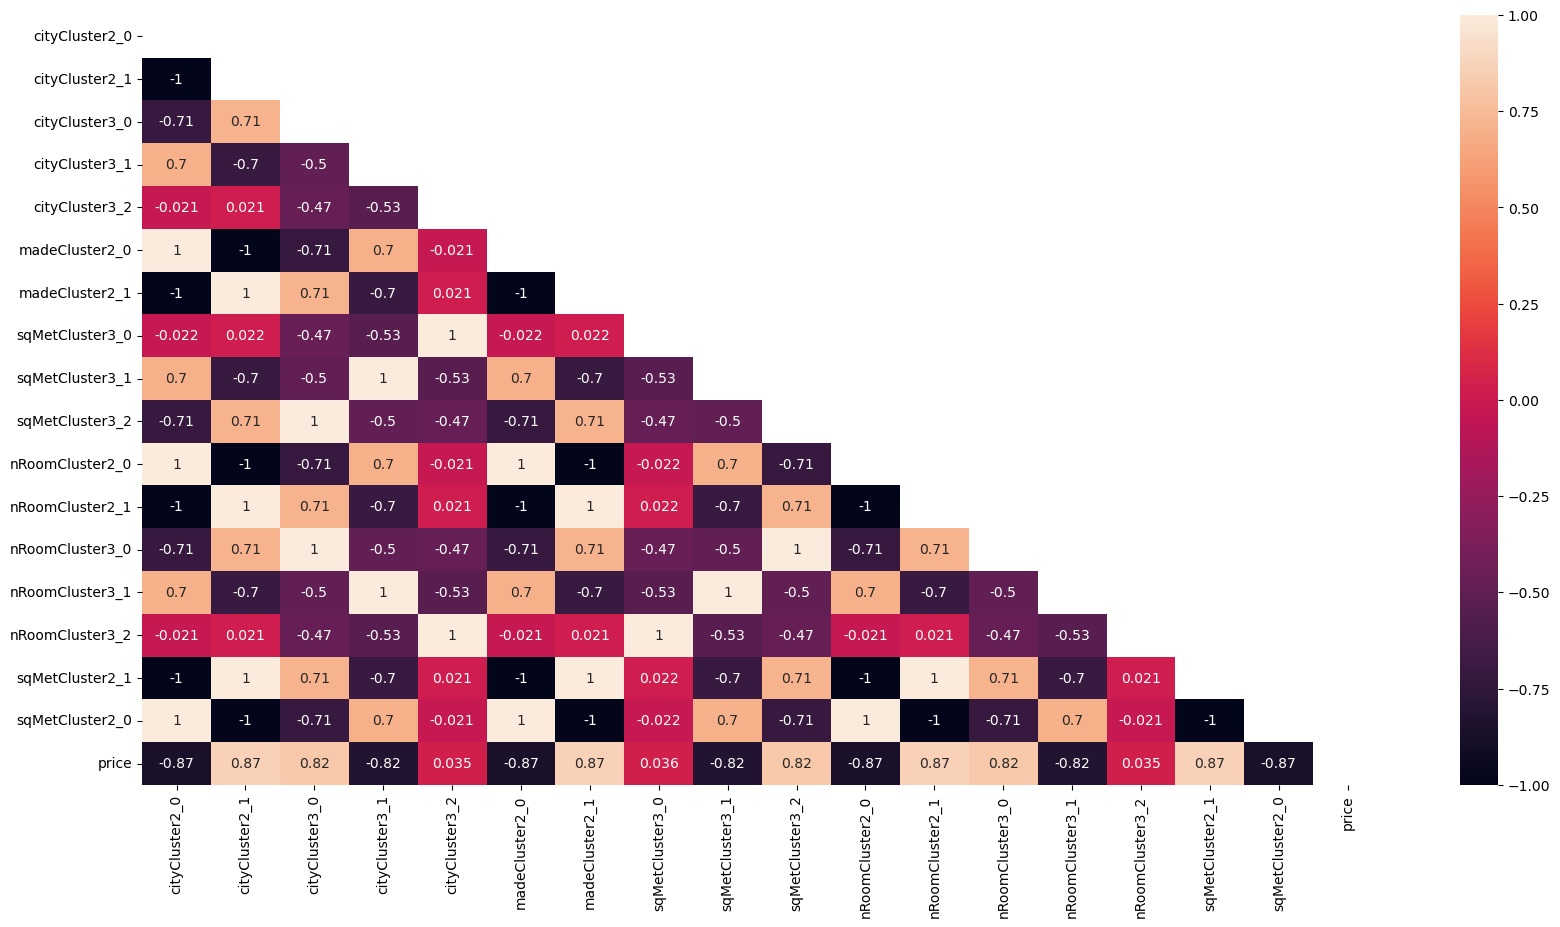

In [41]:
interaction_cols = ['cityCluster2_0', 'cityCluster2_1', 'cityCluster3_0', 'cityCluster3_1', 'cityCluster3_2', 'madeCluster2_0', 'madeCluster2_1', 'sqMetCluster3_0', 'sqMetCluster3_1', 'sqMetCluster3_2', 'nRoomCluster2_0', 'nRoomCluster2_1', 'nRoomCluster3_0', 'nRoomCluster3_1', 'nRoomCluster3_2', 'sqMetCluster2_1', 'sqMetCluster2_0', 'price']
plt.figure(figsize=(20,10))
mask = np.triu(np.ones_like(train[interaction_cols].corr()))
sns.heatmap(train[interaction_cols].corr(),annot=True,mask=mask)
plt.show()

There is really good separation in these clusters in terms of price but a lot of them are heavily correlated. All of these can be condensed to just cityCluster2 which already has really good separation

In [42]:
train.head()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,isNewBuilt,hasStormProtector,basement,...,nRoomCluster3_0,nRoomCluster3_1,nRoomCluster3_2,nRoomCluster2_0,nRoomCluster2_1,sqMetCluster2_0,sqMetCluster2_1,sqMetCluster3_0,sqMetCluster3_1,sqMetCluster3_2
0,0,34291,24,1,0,47,35693,0,1,8,...,0,0,1,1,0,1,0,1,0,0
1,1,95145,60,0,1,60,34773,0,1,729,...,1,0,0,0,1,0,1,0,0,1
2,2,92661,45,1,1,62,45457,1,1,7473,...,1,0,0,0,1,0,1,0,0,1
3,3,97184,99,0,0,59,15113,0,1,6424,...,1,0,0,0,1,0,1,0,0,1
4,4,61752,100,0,0,57,64245,1,0,7151,...,0,0,1,0,1,0,1,1,0,0


# Compare with Outliers Removed

I noticed that the performance of my models changed quite a bit when I removed outliers. Below I explore how removing outliers affects the correlation among clusters.

In [43]:
train = pd.read_csv('/kaggle/input/playground-series-s3e6/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e6/test.csv')
samp_sub = pd.read_csv('/kaggle/input/playground-series-s3e6/sample_submission.csv')

In [44]:
#FUNCTION TO DETECT OUTLIERS
def detect_outliers(data):
    outlier_percents = {}
    for column in data.columns:
        q1 = np.quantile(data[column], 0.25)
        q3 = np.quantile(data[column], 0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_percent = (outliers.shape[0] / data.shape[0]) * 100
        outlier_percents[column] = outlier_percent
        
    outlier_dataframe = pd.DataFrame(data = outlier_percents.values() ,index=outlier_percents.keys() ,columns=['Outlier_percentage'])
    
    return outlier_dataframe.sort_values(by = 'Outlier_percentage')


detect_outliers(train)

,Outlier_percentage
id,0.000000
hasStorageRoom,0.000000
hasStormProtector,0.000000
isNewBuilt,0.000000
hasGuestRoom,0.000000
cityPartRange,0.000000
numPrevOwners,0.000000
hasPool,0.000000
hasYard,0.000000
numberOfRooms,0.000000


In [45]:
def outlier_removal(data , i):
    q1 = np.quantile(data[i] ,0.25)
    q3 = np.quantile(data[i] , 0.75)
    iqr = q3-q1
    lower_tail = q1 - 1.5*iqr
    upper_tail = q3 + 1.5*iqr
    data.drop(data[data[i]> upper_tail].index , inplace = True)
    data.drop(data[data[i]< lower_tail].index ,inplace =True)
    
outlier_list = ['squareMeters' ,'floors','garage' ,'basement' ,'made' ,'cityCode' ,'attic']
for  i in outlier_list:
    outlier_removal(train ,i)

In [46]:
detect_outliers(train)

,Outlier_percentage
id,0.0
hasStorageRoom,0.0
garage,0.0
attic,0.0
basement,0.0
hasStormProtector,0.0
isNewBuilt,0.0
made,0.0
numPrevOwners,0.0
cityPartRange,0.0


In [47]:
def createClusterColumn(train_df, test_df, col, newColName, nClusters):
    KData = train_df[['price', col]]
    k_means_optimum = KMeans(n_clusters = nClusters, init = 'k-means++',  random_state=42)
    y = k_means_optimum.fit_predict(KData)

    train_df[newColName] = y
    
    #extract centers
    centers = []
    for center in k_means_optimum.cluster_centers_:
        centers.append(center[:2])
    
    test_df[newColName] = test.apply(lambda row: test_cluster_calc(row, col, centers), axis=1)
    
    sns.violinplot(x =newColName,
                   y ="price",
                   data = train_df)
    plt.title(newColName)
    plt.show()

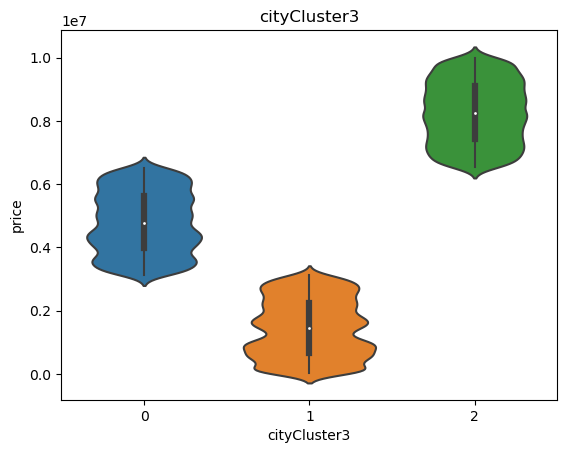

In [48]:
createClusterColumn(train, test, 'cityCode', 'cityCluster3', 3)

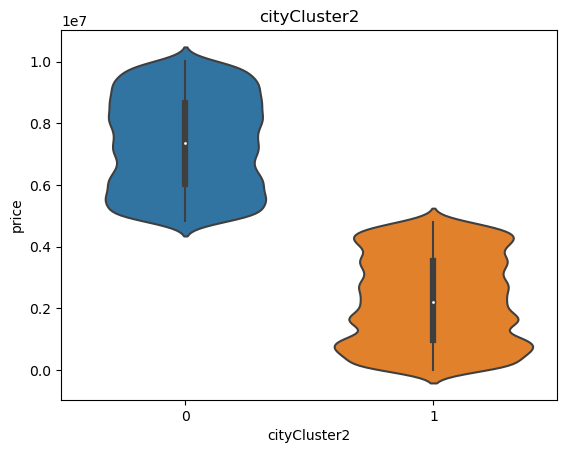

In [49]:
createClusterColumn(train, test, 'cityCode', 'cityCluster2', 2)

# Year

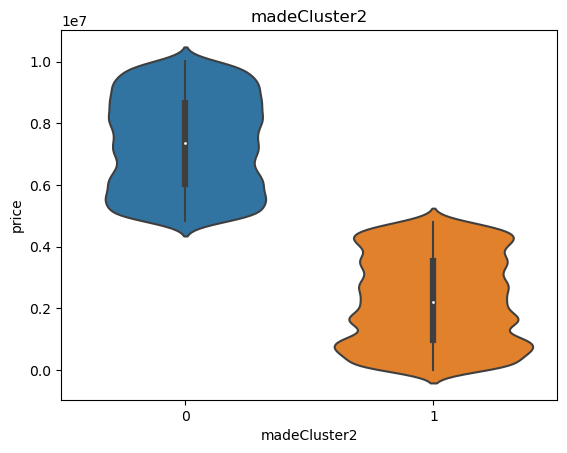

In [50]:
createClusterColumn(train, test, 'made', 'madeCluster2', 2)

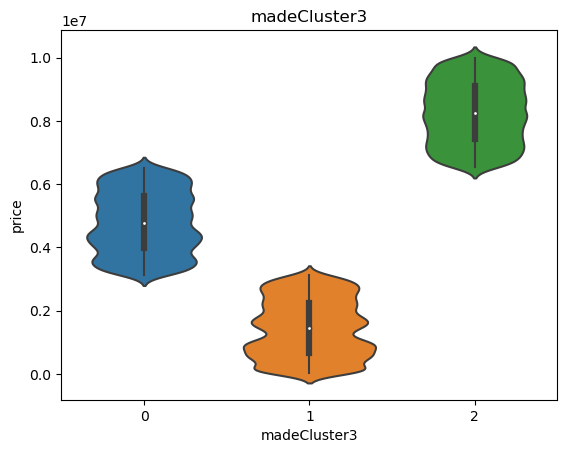

In [51]:
createClusterColumn(train, test, 'made', 'madeCluster3', 3)

# Square Meters

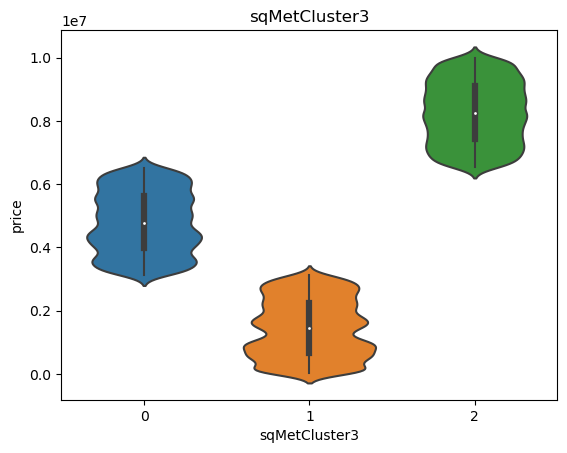

In [52]:
createClusterColumn(train, test, 'squareMeters', 'sqMetCluster3', 3)

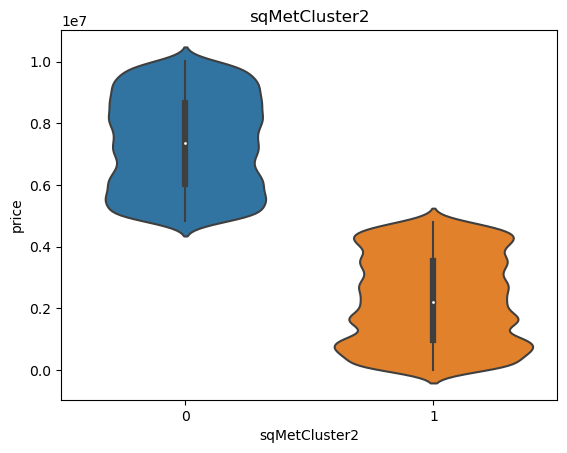

In [53]:
createClusterColumn(train, test, 'squareMeters', 'sqMetCluster2', 2)

# Number of Rooms

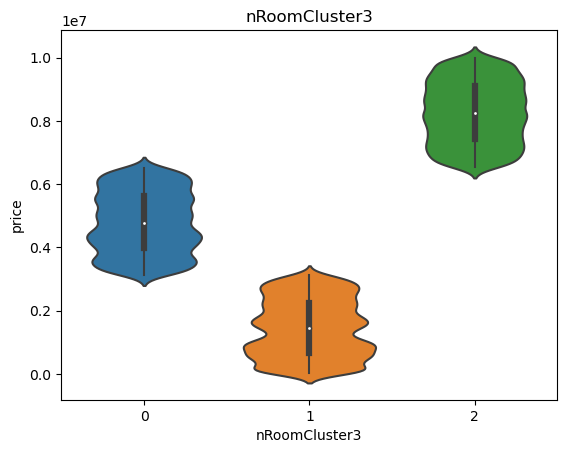

In [54]:
createClusterColumn(train, test, 'numberOfRooms', 'nRoomCluster3', 3)

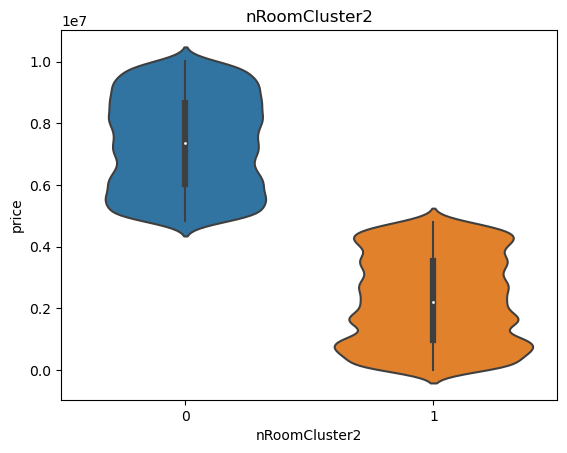

In [55]:
createClusterColumn(train, test, 'numberOfRooms', 'nRoomCluster2', 2)

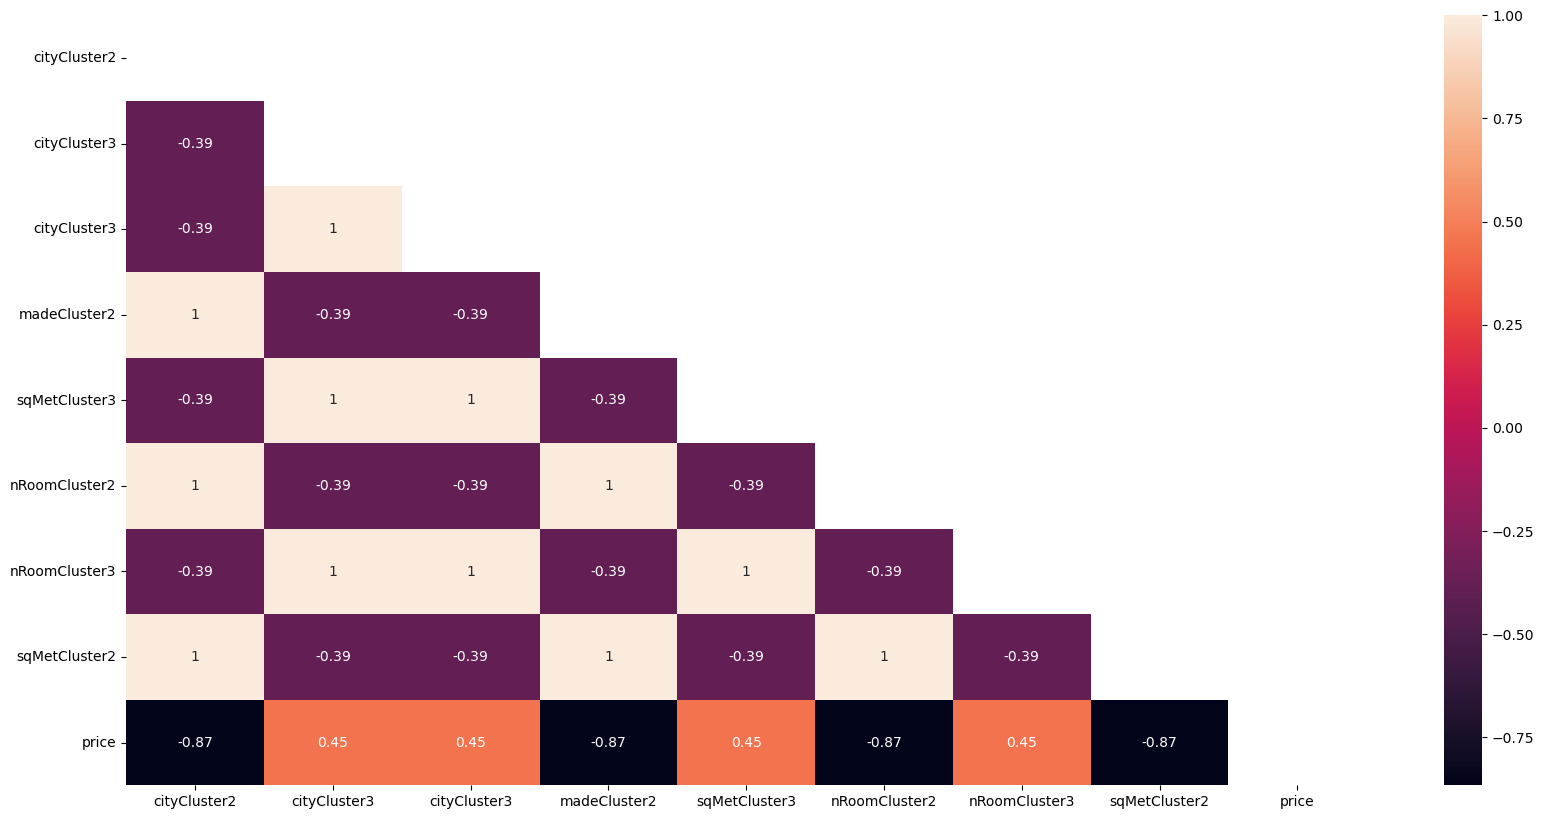

In [56]:
interaction_cols = ['cityCluster2', 'cityCluster3', 'cityCluster3', 'madeCluster2', 'sqMetCluster3', 'nRoomCluster2', 'nRoomCluster3', 'sqMetCluster2', 'price']
plt.figure(figsize=(20,10))
mask = np.triu(np.ones_like(train[interaction_cols].corr()))
sns.heatmap(train[interaction_cols].corr(),annot=True,mask=mask)
plt.show()

The relationship between the clusters drastically changes by removing outliers